# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of deep learning architectures that have significantly advanced the field of computer vision. Inspired by the human visual system, CNNs excel at processing and analyzing visual data, such as images and videos. With the ability to capture spatial and temporal dependencies within data, CNNs have demonstrated exceptional performance in tasks including image classification, object detection, and segmentation.

We first need to understand the convolution operation. We can think of the convolution as a filter (or a kernel) to an input matrix (like an image), producing a feature map that highlights specific patterns such as edges, textures, or shapes. During the convolution operation, the filter slides over the input data, computing a dot product between the filter and the overlapping section of the input at each position.

Visualized example of a 2D convolution of a 5x5 input with a 3x3 kernel is shown below.

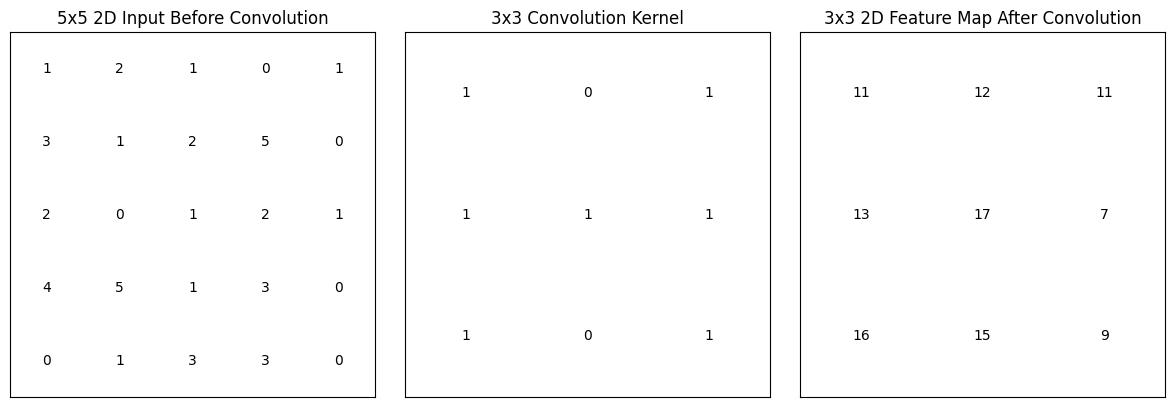

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 2D Input before convolution
input_grid = np.array([
  [1, 2, 1, 0, 1],
  [3, 1, 2, 5, 0],
  [2, 0, 1, 2, 1],
  [4, 5, 1, 3, 0],
  [0, 1, 3, 3, 0]
])

# 3x3 kernel
kernel = np.array([
  [1, 0, 1],
  [1, 1, 1],
  [1, 0, 1]
])

input_background = np.zeros((5,5))
output_background = np.zeros((3,3))

def visualize_convolution(input, kernel, stride=1):
  input_len = input.shape[0]
  kernel_len = kernel.shape[0]
  output_len = np.ceil((input.shape[0] - kernel_len + 1)/stride).astype(int)
  input_background = np.zeros_like(input)
  kernel_background = np.zeros_like(kernel)
  output_background = np.zeros((output_len, output_len))
  # Convolve 2D input with 3x3 kernel
  output_grid = np.zeros_like(output_background)
  for i in range(0, input_len - kernel_len + 1, stride):
    for j in range(0, input_len - kernel_len + 1, stride):
      output_grid[i // stride, j // stride] = np.sum(input[i:i + kernel_len, j:j + kernel_len] * kernel)

  # Plot the 2D input
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.imshow(input_background, cmap='Greys')
  plt.title(f'{input_len}x{input_len} 2D Input Before Convolution')
  plt.xticks([])
  plt.yticks([])
  for i in range(input_len):
    for j in range(input_len):
      plt.text(j, i, str(input_grid[i, j]), ha='center', va='center', color='black')

  # Plot the convolution kernel
  plt.subplot(1, 3, 2)
  plt.imshow(kernel_background, cmap='Greys')
  plt.title(f'{kernel_len}x{kernel_len} Convolution Kernel')
  plt.xticks([])
  plt.yticks([])
  for i in range(kernel_len):
    for j in range(kernel_len):
      plt.text(j, i, str(kernel[i, j]), ha='center', va='center', color='black')

  # Plot the final feature map
  plt.subplot(1, 3, 3)
  plt.imshow(output_background, cmap='Greys')
  plt.title(f'{output_len}x{output_len} 2D Feature Map After Convolution')
  plt.xticks([])
  plt.yticks([])
  for i in range(output_len):
    for j in range(output_len):
      plt.text(j, i, str(int(output_grid[i, j])), ha='center', va='center', color='black')

  plt.tight_layout()
  plt.show()

visualize_convolution(input_grid, kernel, stride=1)

The stride parameter controls the distance by which the filter moves after each convolution operation.

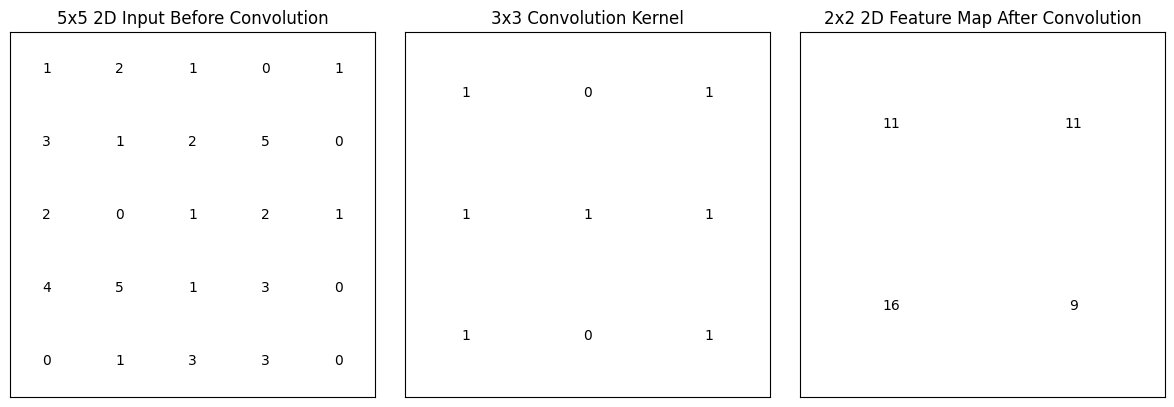

In [ ]:
visualize_convolution(input_grid, kernel, stride=2)

Now, we can examine two different types of pooling techniques: Maxpool and Avgpool.

In [ ]:
def visualize_pooling(input, pooling_size, operation='max_pool', stride=1):
  input_len = input.shape[0]
  output_len = (input_len - pooling_size) // stride + 1
  input_background = np.zeros_like(input)
  output_background = np.zeros((output_len, output_len))

  # Pooling on 2D input
  output_grid = np.zeros((output_len, output_len))
  if operation == 'max_pool':
    for i in range(0, input_len - pooling_size + 1, stride):
      for j in range(0, input_len - pooling_size + 1, stride):
        output_grid[i // stride, j // stride] = np.max(input[i:i + pooling_size, j:j + pooling_size])
  elif operation == 'avg_pool':
    for i in range(0, input_len - pooling_size + 1, stride):
      for j in range(0, input_len - pooling_size + 1, stride):
        output_grid[i // stride, j // stride] = np.mean(input[i:i + pooling_size, j:j + pooling_size])

  # Plot the 2D input
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  plt.imshow(input_background, cmap='Greys')
  plt.title(f'{input_len}x{input_len} 2D Input Before {operation}')
  plt.xticks([])
  plt.yticks([])
  for i in range(input_len):
    for j in range(input_len):
      plt.text(j, i, str(input[i, j]), ha='center', va='center', color='black')

  # Plot the pooling output
  plt.subplot(1, 2, 2)
  plt.imshow(output_background, cmap='Greys')
  plt.title(f'{output_len}x{output_len} 2D Feature Map After {operation}')
  plt.xticks([])
  plt.yticks([])
  for i in range(output_len):
    for j in range(output_len):
      if operation == 'max_pool':
        val = int(output_grid[i, j])
      else:
        val = round(output_grid[i, j], 2)
      plt.text(j, i, str(val), ha='center', va='center', color='black')

  plt.tight_layout()
  plt.show()

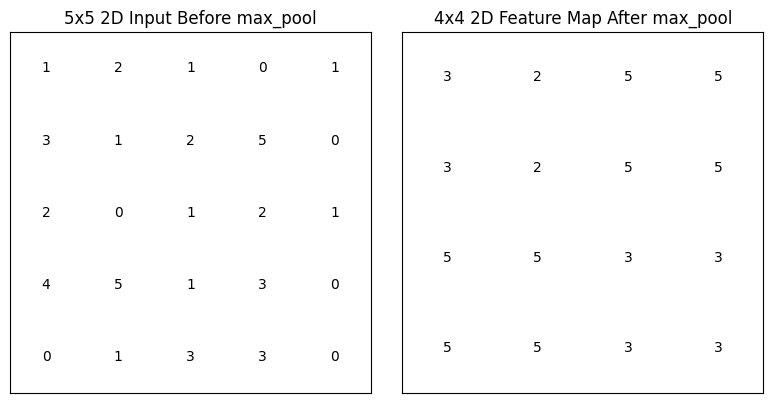

In [ ]:
visualize_pooling(input_grid, 2, operation='max_pool', stride=1)

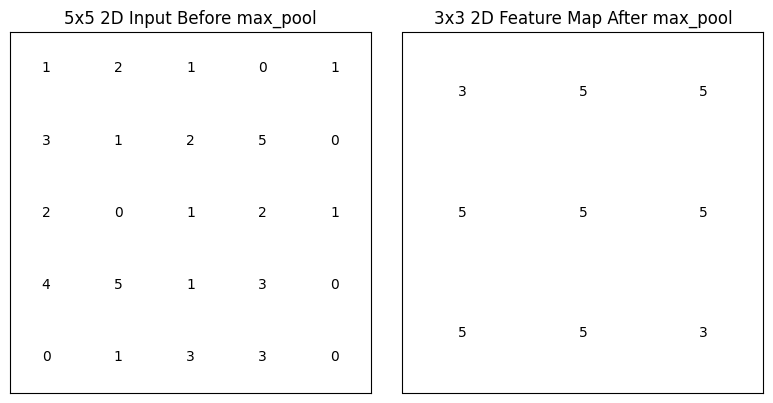

In [ ]:
visualize_pooling(input_grid, 3, operation='max_pool', stride=1)

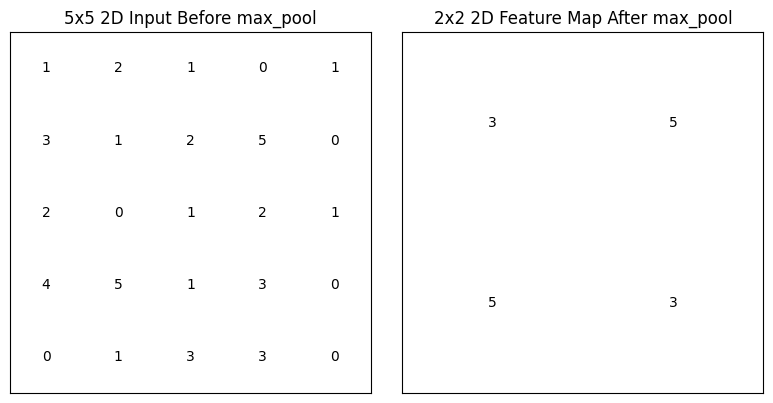

In [ ]:
visualize_pooling(input_grid, 2, operation='max_pool', stride=2)

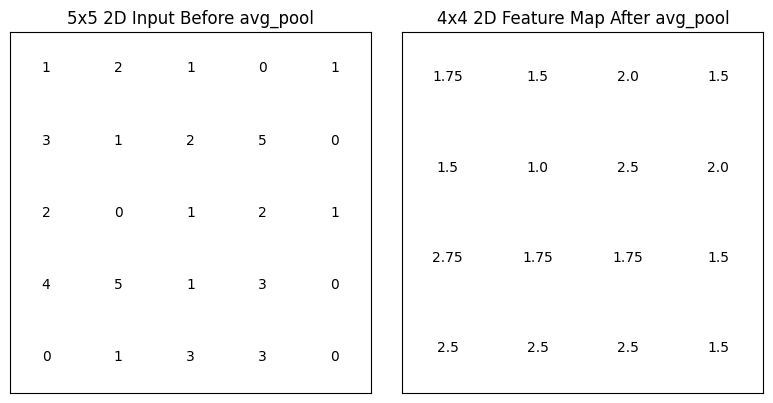

In [ ]:
visualize_pooling(input_grid, 2, operation='avg_pool', stride=1)

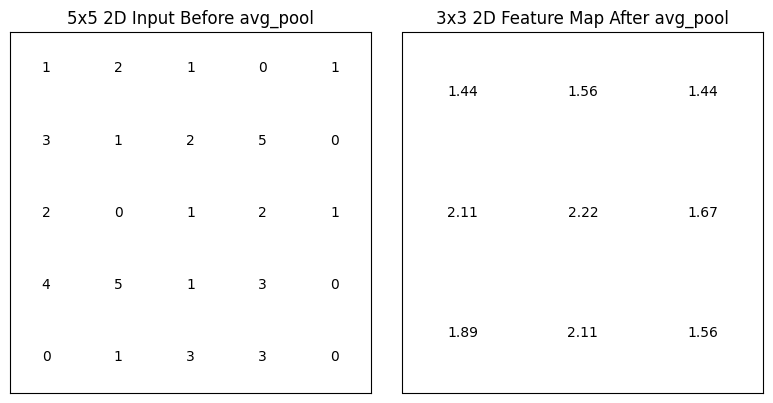

In [ ]:
visualize_pooling(input_grid, 3, operation='avg_pool', stride=1)

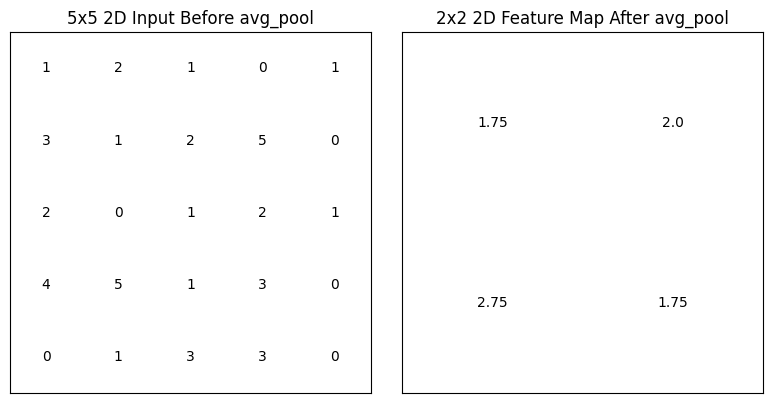

In [ ]:
visualize_pooling(input_grid, 2, operation='avg_pool', stride=2)

## Creating our first CNN model in PyTorch

In PyTorch, we do not have to implement the convolution function ourselves. PyTorch provides the torch.nn module, which includes CNN.

In [ ]:
#Import pytorch packages
import torch
import torch.nn as nn
import torch.nn.functional as F

Here, we define a simple CNN model which uses two convolutional layers followed by two fully connected layers. You can confirm the dimensions of the outputs as the 28x28 input propagates through the network.

In [ ]:
class SIMPLE_CNN(nn.Module):
  def __init__(self):
    super(SIMPLE_CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(5 * 24 * 24, 30)  # 24x24 is the output size after convolution. 5 comes from the number of output channels we have after the second convolution
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(30, 10)

  def forward(self, x):
    print(f"Input Size: {x.size()}")
    # Apply the first convolutional layer followed by ReLU activation
    out = F.relu(self.conv1(x))
    print(f"Size After 1st CONV Layer: {out.size()}")
    # Apply the second convolutional layer followed by ReLU activation
    out = F.relu(self.conv2(out))
    print(f"Size After 2nd CONV Layer: {out.size()}")
    # Flatten the output tensor
    out = out.view(-1, 5 * 24 * 24)
    print(f"Size After Flattening: {out.size()}")
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    print(f"Size After FC1: {out.size()}")
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    print(f"Size After FC2: {out.size()}")
    return out

In [ ]:
#Create an instance of the CNN class
simple_cnn = SIMPLE_CNN()
#Create a tensor (batch_size=1, channels=1, height=28, width=28)
input = torch.randn(1, 1, 28, 28)
#Feed the input to the CNN model
output = simple_cnn(input)

Input Size: torch.Size([1, 1, 28, 28])
Size After 1st CONV Layer: torch.Size([1, 3, 26, 26])
Size After 2nd CONV Layer: torch.Size([1, 5, 24, 24])
Size After Flattening: torch.Size([1, 2880])
Size After FC1: torch.Size([1, 30])
Size After FC2: torch.Size([1, 10])


Now, we can examine two different types of pooling techniques: Maxpool and Avgpool

In [ ]:
input = torch.randn(1, 1, 28, 28)

# Max Pooling layer
# 2x2 Max Pooling with stride 1
maxpool = nn.MaxPool2d(kernel_size=2, stride=1)
maxpool_output = maxpool(input)
print(f"Max Pooled Output Size: {maxpool_output.size()}")

# Average Pooling layer
# 2x2 Average Pooling with stride 1
avgpool = nn.AvgPool2d(kernel_size=2, stride=1)
avgpool_output = avgpool(input)
print(f"Average Pooled Output Size: {avgpool_output.size()}")

Max Pooled Output Size: torch.Size([1, 1, 27, 27])
Average Pooled Output Size: torch.Size([1, 1, 27, 27])


The stride parameter controls the distance by which the filter moves after each convolution operation.

In [ ]:
# Max Pooling layer
# 2x2 Max Pooling with stride 2
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
maxpool_output = maxpool(input)
print(f"Max Pooled Output Size: {maxpool_output.size()}")

# Average Pooling layer
# 2x2 Average Pooling with stride 2
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
avgpool_output = avgpool(input)
print(f"Average Pooled Output Size: {avgpool_output.size()}")

Max Pooled Output Size: torch.Size([1, 1, 14, 14])
Average Pooled Output Size: torch.Size([1, 1, 14, 14])


Now, we can define a CNN model which uses two convolutional layers with kernel size of 5 with stride of 2, each followed by a 2x2 maxpool layer of stride 2. After the two convolutional layers,we have two fully connected layers. Here, we assume the input size is 64x64.

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=2)
    # Define the first maxpool layer
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5, stride=2)
    # Define the second maxpool layer
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(5 * 3 * 3, 30)  # Now, 3x3 is the output size after convolution
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(30, 10)

  def forward(self, x):
    print(f"Input Size: {x.size()}")
    # Apply the first convolutional layer
    out = F.relu(self.conv1(x))
    print(f"Size After 1st CONV Layer: {out.size()}")
    # Apply the first convolutional layer
    out = self.max_pool1(out)
    print(f"Size After 1st MAXPOOL Layer: {out.size()}")
    # Apply the second convolutional layer
    out = F.relu(self.conv2(out))
    print(f"Size After 2nd CONV Layer: {out.size()}")
    # Apply the second maxpool layer
    out = self.max_pool2(out)
    print(f"Size After 2nd MAXPOOL Layer: {out.size()}")
    # Flatten the output tensor
    out = out.view(-1, 5 * 3 * 3)
    print(f"Size After Flattening: {out.size()}")
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    print(f"Size After FC1: {out.size()}")
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    print(f"Size After FC2: {out.size()}")
    return out

In [ ]:
#Create an instance of the CNN class
cnn = CNN()
#Create a tensor (batch_size=1, channels=1, height=64, width=64)
input = torch.randn(1, 1, 64, 64)
#Feed the input to the CNN model
output = cnn(input)

Input Size: torch.Size([1, 1, 64, 64])
Size After 1st CONV Layer: torch.Size([1, 3, 30, 30])
Size After 1st MAXPOOL Layer: torch.Size([1, 3, 15, 15])
Size After 2nd CONV Layer: torch.Size([1, 5, 6, 6])
Size After 2nd MAXPOOL Layer: torch.Size([1, 5, 3, 3])
Size After Flattening: torch.Size([1, 45])
Size After FC1: torch.Size([1, 30])
Size After FC2: torch.Size([1, 10])


## MNIST Handwritten Digit Classification with CNN

Now we can apply CNN to the MNIST dataset. The goal of out model is to accurately classify handwritten digits from the MNIST dataset. MNIST data consists of 28x28 pixel grayscale images of handwritten digits from 0 to 9.

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import torch.optim as optim

Here are some example images from the MNIST dataset.

100%|██████████| 9912422/9912422 [00:00<00:00, 109070213.64it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 14929220.34it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27146266.34it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5045161.22it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



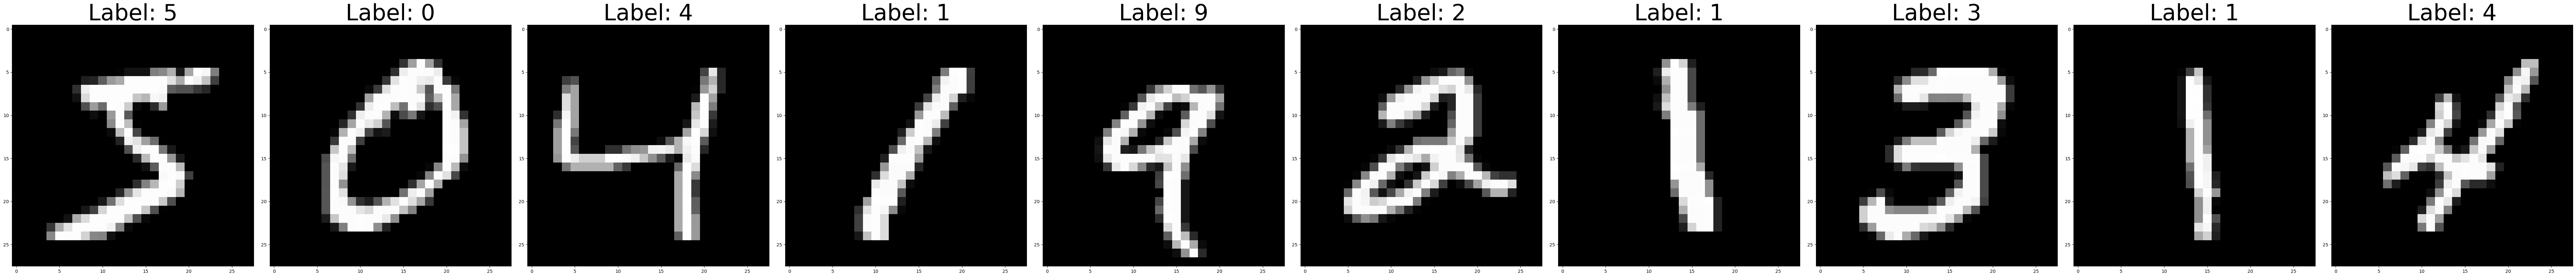

In [ ]:
BATCH_SIZE = 100

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

train_loader = torch.utils.data.DataLoader(
    dataset=mnist_train, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(
    dataset=mnist_test, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

plt.figure(figsize=(80,8))
for i in range(10):
    image, label = mnist_train[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}', fontsize=50)

plt.tight_layout()
plt.show()

Here we define a CNN model for the classification of MNIST digits.

In [ ]:
class MNIST_CNN(nn.Module):
  def __init__(self):
    super(MNIST_CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1)
    # Define the first maxpool layer
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
    # Define the second maxpool layer
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(32 * 4 * 4, 64)
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    # Apply the first convolutional layer
    out = F.relu(self.conv1(x))
    # Apply the first convolutional layer
    out = self.max_pool1(out)
    # Apply the second convolutional layer
    out = F.relu(self.conv2(out))
    # Apply the second maxpool layer
    out = self.max_pool2(out)
    # Flatten the output tensor
    out = out.view(-1, 32 * 4 * 4)
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = MNIST_CNN().to(device)
data = torch.randn(1,1,28,28)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on CPU...
(1, 10)


In [ ]:
LR = 0.01
MOMENTUM = 0.9
REG = 1e-4
EPOCHS = 10

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=REG)

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples
  print("Training accuracy: %.4f" %(avg_acc))

==> Training starts!
Epoch 0:
Training accuracy: 0.5182
Epoch 1:
Training accuracy: 0.5884
Epoch 2:
Training accuracy: 0.5910
Epoch 3:
Training accuracy: 0.5922
Epoch 4:
Training accuracy: 0.5933
Epoch 5:
Training accuracy: 0.5936
Epoch 6:
Training accuracy: 0.5946
Epoch 7:
Training accuracy: 0.6901
Epoch 8:
Training accuracy: 0.6909
Epoch 9:
Training accuracy: 0.7645


We see that we can easily achieve 97% training accuracy even after the first epoch. After all 10 epochs, we reach 99% accuracy on the training set. Now, we test our model on unseen testing set to evaluate our model performance.

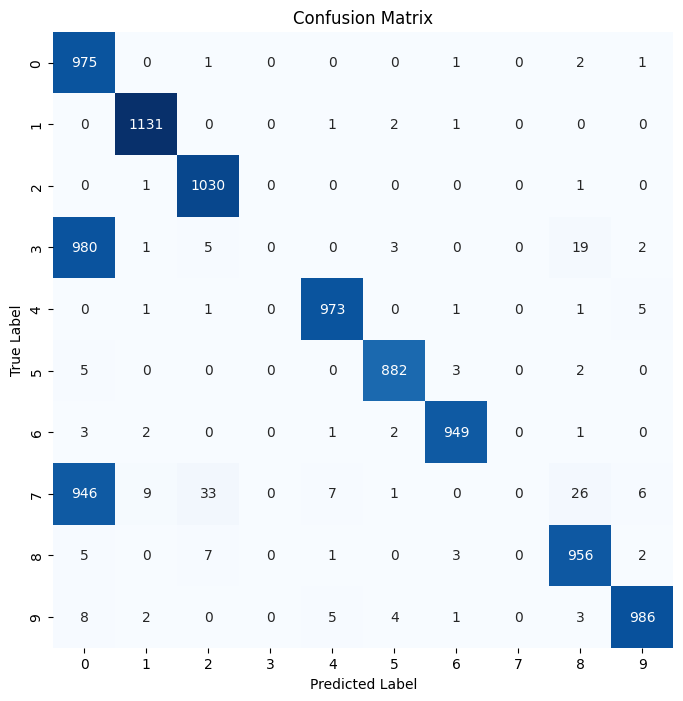

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

true_labels = []
predicted_labels = []
total_examples = 0
correct_examples = 0

model.eval()
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)
      out = model(inputs)
      _, predicted = torch.max(out, 1)
      total_examples += targets.size(0)
      correct_examples += (predicted == targets).sum().item()
      true_labels.append(targets.cpu().numpy())
      predicted_labels.append(predicted.cpu().numpy())
    avg_acc = correct_examples / total_examples

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
conf_matrix = confusion_matrix(true_labels.flatten(), predicted_labels.flatten())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We see that our CNN model successfully classifies 98.9% of the MNIST images.

## CIFAR10 Image Classification wtih Simple CNN

Now, we aim to apply our CNN knowledge on a much bigger dataset, namely the CIFAR10 dataset which contains 60,000 RGB (3 channel) images of size 32x32. There are 10 classes, thus the name CIFAR10. We can use the same workflow as above by first showing some examples from the CIFAR10 dataset.

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import torch.optim as optim
from torch.utils.data import random_split
import warnings
import matplotlib.pyplot as plt

Files already downloaded and verified
Files already downloaded and verified
Train Size: 45000
Val Size: 5000
Test Size: 10000


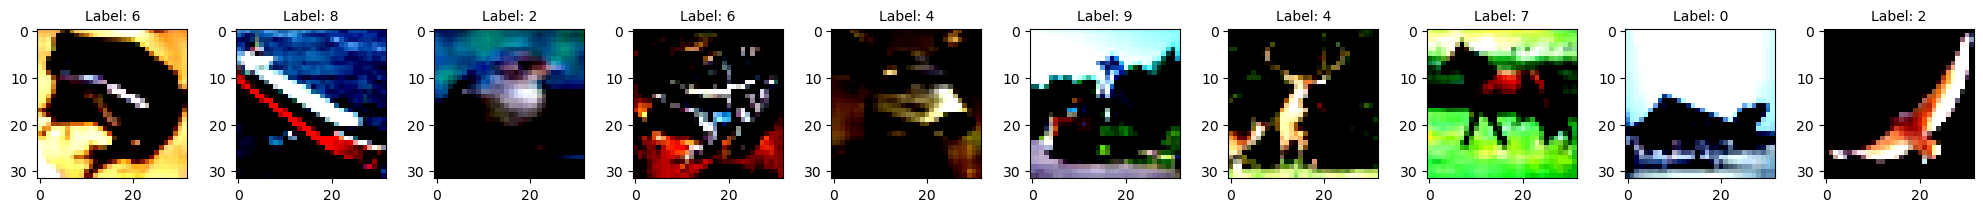

In [ ]:
warnings.filterwarnings('ignore')

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(size=(32, 32), padding=4),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
])

CIFAR10_train_full = dsets.CIFAR10(root='CIFAR10_data/',
                                   train=True,
                                   transform=train_transform,
                                   download=True)

CIFAR10_train, CIFAR10_val = random_split(CIFAR10_train_full, [45000, 5000])

CIFAR10_val.dataset.transform = test_transform

CIFAR10_test = dsets.CIFAR10(root='CIFAR10_data/',
                             train=False,
                             transform=test_transform,
                             download=True)

print('Train Size:', len(CIFAR10_train))
print('Val Size:', len(CIFAR10_val))
print('Test Size:', len(CIFAR10_test))

plt.figure(figsize=(20, 2))
for i in range(10):
    image, label = CIFAR10_train[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).clamp(0, 1))
    plt.title(f'Label: {label}', fontsize=10)

plt.tight_layout()
plt.show()


Here, we define our model to classify CIFAR100 with a simple CNN model. We have three convolution layers followed by two fully connected with layer.

In [ ]:
class CIFAR_CNN(nn.Module):
  def __init__(self):
    super(CIFAR_CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(128)
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 4 * 4, 512)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(512, 10)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.max_pool(out)
    out = F.relu(self.bn2(self.conv2(out)))
    out = self.max_pool(out)
    out = F.relu(self.bn3(self.conv3(out)))
    out = self.max_pool(out)
    out = out.view(-1, 128 * 4 * 4)
    out = F.relu(self.fc1(out))
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = CIFAR_CNN().to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 10)


In [ ]:
LR = 0.001
REG = 1e-4
EPOCHS = 20
BATCH_SIZE = 100

train_loader = torch.utils.data.DataLoader(
    dataset=CIFAR10_train, batch_size=BATCH_SIZE, shuffle=True)

val_loader = torch.utils.data.DataLoader(
    dataset=CIFAR10_val, batch_size=BATCH_SIZE, shuffle=False)

test_loader = torch.utils.data.DataLoader(
    dataset=CIFAR10_test, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, EPOCHS, BATCH_SIZE, scheduler=None, print_epoch=1):
    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []

    print("==> Training starts!")
    print("="*50)
    for i in range(0, EPOCHS):
      model.train()
      if i % print_epoch == 0:
          print("Epoch %d:" %i)
      total_examples = 0
      correct_examples = 0
      total_train_loss = 0
      for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        out = model(inputs)
        loss = criterion(out, targets)
        total_train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(out, 1)
        total_examples += targets.size(0)
        correct_examples += (predicted == targets).sum().item()
      train_avg_acc = correct_examples / total_examples
      train_acc.append(train_avg_acc)
      train_loss.append(total_train_loss / len(train_loader))

      model.eval()
      total_examples = 0
      correct_examples = 0
      total_val_loss = 0
      with torch.no_grad():
          for batch_idx, (inputs, targets) in enumerate(val_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            out = model(inputs)
            loss = criterion(out, targets)
            total_val_loss += loss.item()
            _, predicted = torch.max(out, 1)
            total_examples += targets.size(0)
            correct_examples += (predicted == targets).sum().item()
          val_avg_acc = correct_examples / total_examples
          val_acc.append(val_avg_acc)
          val_loss.append(total_val_loss / len(val_loader))
      if scheduler:
        scheduler.step()
      if i % print_epoch == 0:
          print("Training accuracy: %.4f, Validation accuracy: %.4f" %(train_avg_acc, val_avg_acc))

    return train_acc, train_loss, val_acc, val_loss

def test_model(model, test_loader, criterion, optimizer):
  model.eval()
  total_examples = 0
  correct_examples = 0
  total_test_loss = 0
  with torch.no_grad():
      for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        out = model(inputs)
        loss = criterion(out, targets)
        total_test_loss += loss.item()
        _, predicted = torch.max(out, 1)
        total_examples += targets.size(0)
        correct_examples += (predicted == targets).sum().item()
  test_avg_acc = correct_examples / total_examples
  print("Test accuracy: %.4f" % (test_avg_acc))
  test_avg_loss = total_test_loss / len(test_loader)
  print("Test loss: %.4f" % (test_avg_loss))
  return test_avg_acc, test_avg_loss

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)
EPOCHS = 20

train_acc, train_loss, val_acc, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, EPOCHS, BATCH_SIZE)

==> Training starts!
Epoch 0:
Training accuracy: 0.4945, Validation accuracy: 0.6170
Epoch 1:
Training accuracy: 0.6467, Validation accuracy: 0.6652
Epoch 2:
Training accuracy: 0.6905, Validation accuracy: 0.7316
Epoch 3:
Training accuracy: 0.7264, Validation accuracy: 0.7612
Epoch 4:
Training accuracy: 0.7498, Validation accuracy: 0.7530
Epoch 5:
Training accuracy: 0.7712, Validation accuracy: 0.7482
Epoch 6:
Training accuracy: 0.7875, Validation accuracy: 0.7474
Epoch 7:
Training accuracy: 0.8068, Validation accuracy: 0.7750
Epoch 8:
Training accuracy: 0.8222, Validation accuracy: 0.7750
Epoch 9:
Training accuracy: 0.8329, Validation accuracy: 0.7784
Epoch 10:
Training accuracy: 0.8466, Validation accuracy: 0.7858
Epoch 11:
Training accuracy: 0.8566, Validation accuracy: 0.7980
Epoch 12:
Training accuracy: 0.8688, Validation accuracy: 0.7822
Epoch 13:
Training accuracy: 0.8830, Validation accuracy: 0.7958
Epoch 14:
Training accuracy: 0.8890, Validation accuracy: 0.7862
Epoch 15:
Trai

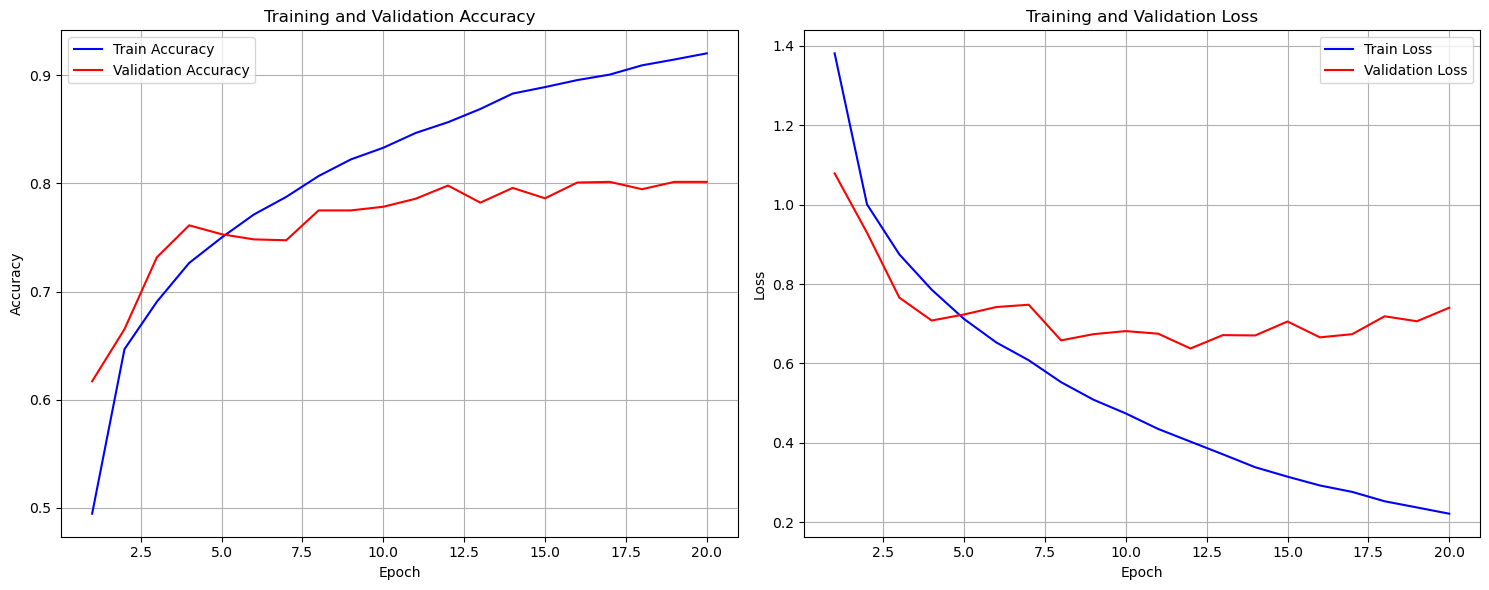

In [ ]:
x = np.arange(20) + 1
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x, train_acc, 'b-', label='Train Accuracy')
plt.plot(x, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, train_loss, 'b-', label='Train Loss')
plt.plot(x, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
test_model(model, test_loader, criterion, optimizer)

Test accuracy: 0.7950
Test loss: 0.7656


(0.795, 0.7656001099944114)

Our very simple CNN model, even with short training (about 6 epochs are enough, where the model doesn't overfit on the training data), was able to classify the CIFAR10 images 79% of the time. Deeper network will allow us to perform much better on the dataset. Before we move directly into a deeper CNN model, we will train and test on a much harder dataset: CIFAR100. CIFAR100 is the exact same dataset as CIFAR10. The only difference is that each class is divided into 10 subclasses. Thus, we need a much more precise model that can predict 1 of the 100 classes.

100%|██████████| 169001437/169001437 [00:13<00:00, 12960152.84it/s]


Extracting CIFAR100_data/cifar-100-python.tar.gz to CIFAR100_data/
Files already downloaded and verified
Train Size: 45000
Val Size: 5000
Test Size: 10000


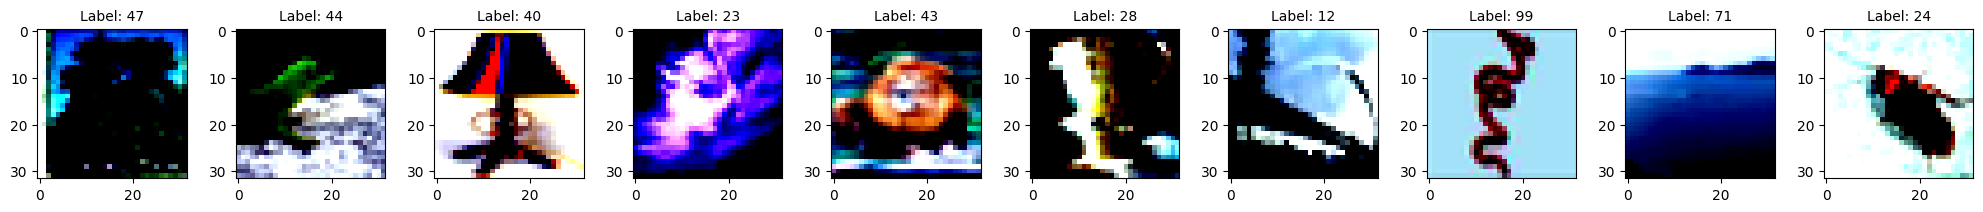

In [ ]:
warnings.filterwarnings('ignore')

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(size=(32, 32), padding=4),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
])

CIFAR100_train_full = dsets.CIFAR100(root='CIFAR100_data/',
                                   train=True,
                                   transform=train_transform,
                                   download=True)

CIFAR100_train, CIFAR100_val = random_split(CIFAR100_train_full, [45000, 5000])

CIFAR100_val.dataset.transform = test_transform

CIFAR100_test = dsets.CIFAR100(root='CIFAR100_data/',
                             train=False,
                             transform=test_transform,
                             download=True)

print('Train Size:', len(CIFAR100_train))
print('Val Size:', len(CIFAR100_val))
print('Test Size:', len(CIFAR100_test))

plt.figure(figsize=(20, 2))
for i in range(10):
    image, label = CIFAR100_train[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).clamp(0, 1))
    plt.title(f'Label: {label}', fontsize=10)

plt.tight_layout()
plt.show()

For now, let's test on the same network that we used for CIFAR10. The only change that needs to be made is the final fc layer, where we change the output dimension from 10 to 100 so that we can get probabilities for all 100 classes.

In [ ]:
class CIFAR100_CNN(nn.Module):
  def __init__(self):
    super(CIFAR100_CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(128)
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 4 * 4, 512)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(512, 100)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.max_pool(out)
    out = F.relu(self.bn2(self.conv2(out)))
    out = self.max_pool(out)
    out = F.relu(self.bn3(self.conv3(out)))
    out = self.max_pool(out)
    out = out.view(-1, 128 * 4 * 4)
    out = F.relu(self.fc1(out))
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = CIFAR100_CNN().to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)
LR = 0.001
REG = 1e-4
EPOCHS = 50
BATCH_SIZE = 100

train_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_train, batch_size=BATCH_SIZE, shuffle=True)

val_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_val, batch_size=BATCH_SIZE, shuffle=False)

test_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_test, batch_size=BATCH_SIZE, shuffle=False)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)

train_acc, train_loss, val_acc, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, EPOCHS, BATCH_SIZE, 5)

Run on GPU...
(1, 100)
==> Training starts!
Epoch 0:
Training accuracy: 0.1095, Validation accuracy: 0.2018
Epoch 5:
Training accuracy: 0.3430, Validation accuracy: 0.4094
Epoch 10:
Training accuracy: 0.4300, Validation accuracy: 0.4452
Epoch 15:
Training accuracy: 0.4921, Validation accuracy: 0.4636
Epoch 20:
Training accuracy: 0.5422, Validation accuracy: 0.4712
Epoch 25:
Training accuracy: 0.5906, Validation accuracy: 0.4762
Epoch 30:
Training accuracy: 0.6303, Validation accuracy: 0.4712
Epoch 35:
Training accuracy: 0.6680, Validation accuracy: 0.4824
Epoch 40:
Training accuracy: 0.6986, Validation accuracy: 0.4792
Epoch 45:
Training accuracy: 0.7263, Validation accuracy: 0.4654


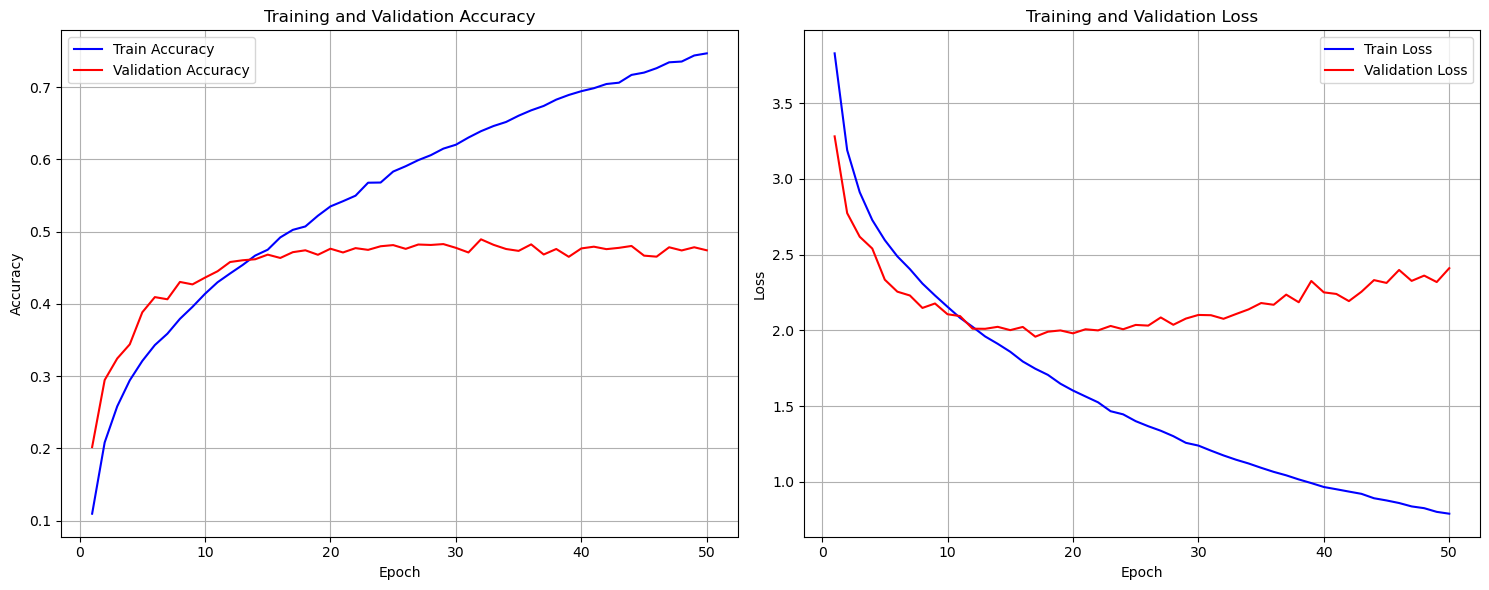

In [ ]:
x = np.arange(50) + 1
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x, train_acc, 'b-', label='Train Accuracy')
plt.plot(x, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, train_loss, 'b-', label='Train Loss')
plt.plot(x, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
test_model(model, test_loader, criterion, optimizer)

Test accuracy: 0.4786
Test loss: 2.3848


(0.4786, 2.384762871265411)

As expected, the model performs worse compared to the CIFAR10 dataset. Yet, it is still surprising to see how the model can guess about half of the images correctly out of the 100 classes. To improve our model performance, let's use a deeper CNN network. Below, I have added two more CNN layers, with out_channel going up to 512, instead of 128.

In [ ]:
class CIFAR100_CNN_deep(nn.Module):
  def __init__(self):
    super(CIFAR100_CNN_deep, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(128)
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.bn4 = nn.BatchNorm2d(256)
    self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.bn5 = nn.BatchNorm2d(512)
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(512 * 4 * 4, 1024)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(1024, 100)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = F.relu(self.bn2(self.conv2(out)))
    out = self.max_pool(out)
    out = F.relu(self.bn3(self.conv3(out)))
    out = F.relu(self.bn4(self.conv4(out)))
    out = self.max_pool(out)
    out = F.relu(self.bn5(self.conv5(out)))
    out = self.max_pool(out)
    out = out.view(-1, 512 * 4 * 4)
    out = F.relu(self.fc1(out))
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = CIFAR100_CNN_deep().to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)
LR = 0.001
REG = 1e-4
EPOCHS = 50
BATCH_SIZE = 100

train_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_train, batch_size=BATCH_SIZE, shuffle=True)

val_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_val, batch_size=BATCH_SIZE, shuffle=False)

test_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_test, batch_size=BATCH_SIZE, shuffle=False)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)

train_acc, train_loss, val_acc, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, EPOCHS, BATCH_SIZE, 5)

Run on GPU...
(1, 100)
==> Training starts!
Epoch 0:
Training accuracy: 0.0524, Validation accuracy: 0.0908
Epoch 5:
Training accuracy: 0.2237, Validation accuracy: 0.3200
Epoch 10:
Training accuracy: 0.3681, Validation accuracy: 0.4484
Epoch 15:
Training accuracy: 0.5503, Validation accuracy: 0.5250
Epoch 20:
Training accuracy: 0.7268, Validation accuracy: 0.5658
Epoch 25:
Training accuracy: 0.8469, Validation accuracy: 0.5600
Epoch 30:
Training accuracy: 0.8975, Validation accuracy: 0.5700
Epoch 35:
Training accuracy: 0.9182, Validation accuracy: 0.5582
Epoch 40:
Training accuracy: 0.9302, Validation accuracy: 0.5758
Epoch 45:
Training accuracy: 0.9374, Validation accuracy: 0.5742


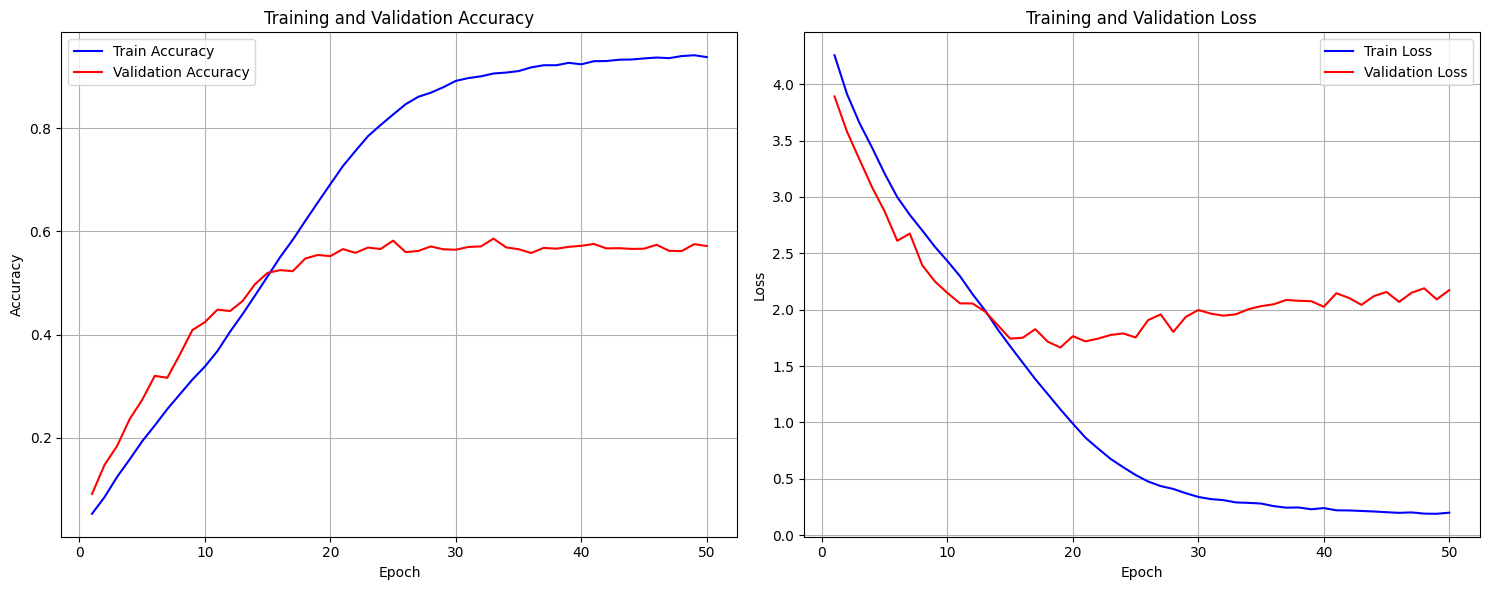

In [ ]:
x = np.arange(50) + 1
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x, train_acc, 'b-', label='Train Accuracy')
plt.plot(x, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, train_loss, 'b-', label='Train Loss')
plt.plot(x, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
test_model(model, test_loader, criterion, optimizer)

Test accuracy: 0.5674
Test loss: 2.1177


(0.5674, 2.1176593363285066)

We see that a deeper CNN allows us to increase the accuracy on the CIFAR100 dataset (~9% increase). One might think that the accuracy is very low; but it is important to acknowledge that we are using the CIFAR100 dataset. Not only does it have 100 classes, each class is part of the bigger class from the CIFAR10 dataset. Calculating the top 1 accuracy is often considered an 'unfair comparison'. For CIFAR100, it is also common to use top 5 accuracy instead to calculate how many times our model was able to include the true class given the 5 most probable classifications.